# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.25.2 which is incompatible.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')
data_orig = data.copy()

In [5]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The dataset has been loaded properly.
* Dataset consists of several columns displaying the various attributes related to each order
* order_id column display the unique order Id for each order
* cutomer_id column display the ID assigned to each customer who has ordered the food
* restaurant_name and cuisine_type columns displays the name of the restaurant and the corresponding cuisine_type  for which order was placed
* cost_of_the_order column provides information on the price of the order that was placed
* day_of_the_week provides details of the day when was it placed like weekend or weekday
* rating column displays the rating given by the customer for that particular order
* food_preparation_time and delivery_time columns provides information on time taken by restaurant to prepare the   order and time taken by the food aggregator company to deliver the order to the customer

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
data.shape

(1898, 9)

#### Observations: 
* The Dataset has 1898 number of rows with 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
* There are 4 int64, 4 object and 1 float64 datatypes in the dataset. 
* We can observe that there are no null values in the dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
* As per the above, there are no null values in any of the columns in the dataset. But we observed from the first 5 rows of the dataset that there are some rows that are mentioned as 'Not Given' in the 'rating' column which means that the actual values are missing or not provided or not captured. And those number can be seen from the value_counts() function

In [192]:
data['rating'].value_counts()

5.00    632
4.00    418
3.00    190
4.28     86
4.51     48
4.22     46
4.33     32
4.13     29
4.50     25
4.43     23
4.33     22
4.59     22
4.18     21
4.36     21
4.24     20
4.35     19
4.24     18
4.56     17
4.67     15
4.71     14
4.36     14
4.12     13
4.27     13
4.20     13
4.62     11
4.06     10
4.15     10
4.42      9
4.25      8
4.40      7
4.75      7
4.70      6
4.32      6
4.30      5
3.50      5
4.69      5
4.86      5
4.29      5
3.25      5
3.67      4
4.36      3
3.75      3
4.88      3
4.10      2
4.29      2
4.35      2
4.45      1
4.60      1
4.38      1
3.33      1
Name: rating, dtype: int64

As there are 736 rows which do not have any ratings mentioned and this is around 40% of the total rating rows. Hence we can replace these values with NaN and they apply appropriate treatment of those missing/null values

In [10]:
data['rating']=data['rating'].replace('Not given',np.nan) ## Replacing the 'Not given' values with NaN

In [11]:
data['rating'].value_counts(dropna=False)

NaN    736
5      588
4      386
3      188
Name: rating, dtype: int64

In [13]:
## Converting the rating column type to int type for further calculations
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

Since the average value of column Rating is somewhat close to median of that column, hence we can impute the missing values with the mean value of that column basis on the restuarants

In [14]:
### We are applying the mean of the rating on the basis of restaurant
data['rating']= data['rating'].fillna(value=data.groupby('restaurant_name')['rating'].transform('mean'))

In [15]:
data['rating'].isnull().sum()

30

We could observe that there are still 30 null values which means that there are no ratings data available for those restaurants. Hence for the remaining restaurants we can impute the missing values based on the cuisine type

In [16]:
### We are applying the mean of the rating on the basis of cuisine type for these orders
data['rating']= data['rating'].fillna(value=data.groupby('cuisine_type')['rating'].transform('mean'))

In [17]:
data['rating'].isnull().sum()

0

#### Observations: 

Overall,we could observe from the top 5 rows of the data that rating columns have "Not given" mentioned instead of rating. And the value_counts shows that we have around 736 rows of "Not given" in this column which is around 40%. Therefore, we need to consider them as null values and convert those into NaN.

After replacing the "Not given" values to NaN, we imputated the missing values with the mean rating for each restaurant. We then found that there are few restaurants whoch do not have any rating data available, hence we imputated those rows with the mean rating for each cuisine_type


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [205]:
# Write your code here
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898.00,NaN,NaN,NaN,4.35,0.61,3.00,4.00,4.33,5.00,5.00
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00
Revenue,1898.00,NaN,NaN,NaN,3.25,2.30,0.00,1.81,2.12,5.57,8.85


#### Observations:

The minimum it takes for food to be prepared is 20 mins and it takes maximum of 35 mins to prepare food. And on an average, it takes 27.37 mins to prepare food

* The above table displays the descriptive analysis for Numerical columns
* It can be observed that the average rating of orders is around 4.35.. As it can be seen that 75% of users have given ratings equal to or greater than 5 to the orders
* On an average, delivery takes around 24 mins to deliver the order once the food is prepared and the food prepartion itself takes around 27 mins to be prepared once the order is placed
* Average cost of the order is 16.5 and around 50% of the orders cost less than the average.
* Shake Shack is the most popular restaurant and American is the most preferred cuisine
* Around 71% of the orders are placed on weekends


### **Question 5:** How many orders are not rated? [1 mark]

In [21]:
# Write the code here
data_orig['rating'].value_counts(dropna=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* As we have already treated the 'Not Given' values in the data dataset, hence we used the copy of dataset to calculate the no of orders that are not rated. And we can observe that there are 736 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order_ID

In [23]:
# check unique order ID
data['order_id'].nunique()

1898

In [24]:
# check unique customer ID
data['customer_id'].nunique()

1200

In [25]:
# check unique restaurant name
data['restaurant_name'].nunique()

178

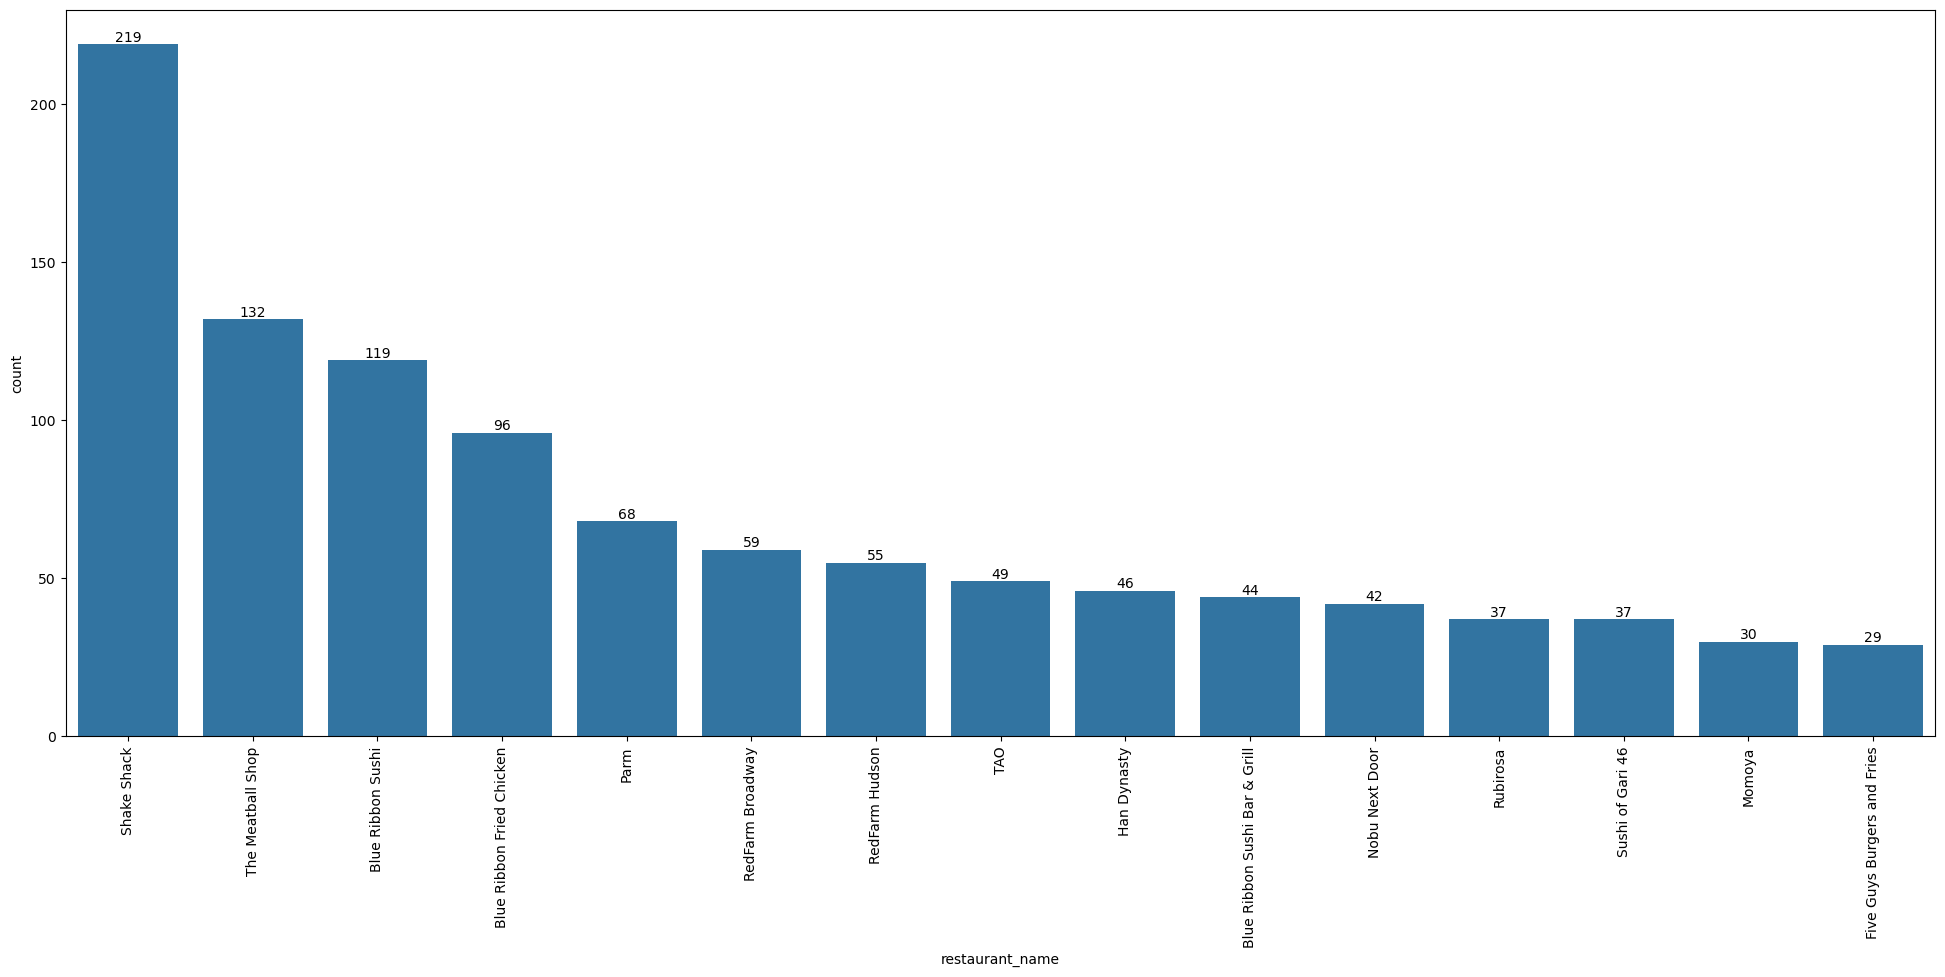

In [132]:
plt.figure(figsize=(20,8))
plot = sns.countplot(data = data, x='restaurant_name',order=data['restaurant_name'].value_counts().nlargest(15).index);
plt.tight_layout()
for container in plot.containers:
    plot.bar_label(container)
plt.xticks(rotation=90);

As there are 178 restaurants to be displayed properly in a graph, hence we displayed the top 15 resaurants as per the no of orders. And we observe that Shake Shack is the top restaurant which has received the highest no of orders

In [38]:
# check unique cuisine type
data['cuisine_type'].nunique()

14

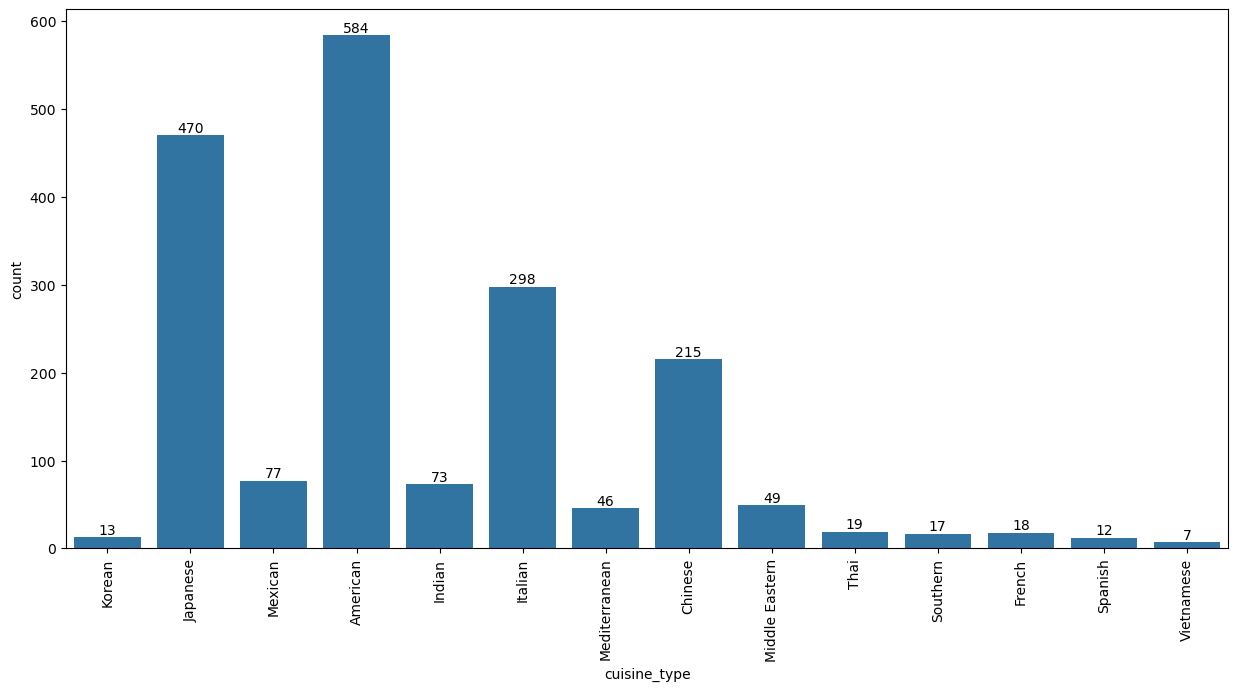

In [35]:
plt.figure(figsize=(15,7))
plot = sns.countplot(data = data, x='cuisine_type');
for container in plot.containers:
    plot.bar_label(container)
plt.xticks(rotation=90);

The top 3 cuisine types are American, Japanese and Italian. American being the most popular of all.
The bottom 3 cuisine types are Vietnamese, Spanish and Korean.

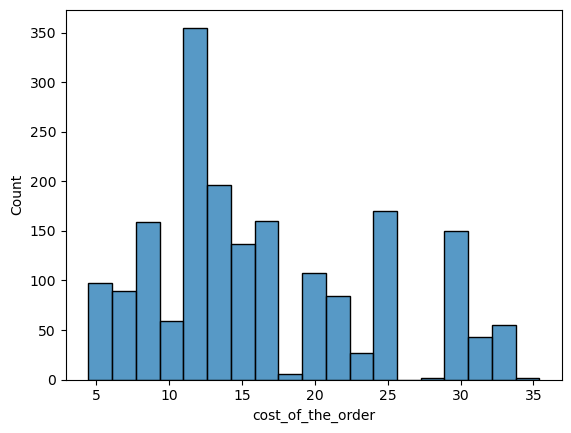

In [50]:
# Write the code here
sns.histplot(data = data, x='cost_of_the_order');

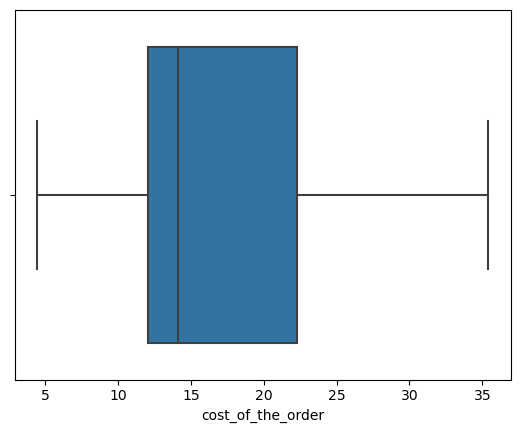

In [52]:
sns.boxplot(data = data, x='cost_of_the_order');

As per the boxplot, we can observe that the cost of the order distribution is highly right skewed.
Most of the orders are less priced. And thus the average price of the order is 16.5. 50% of the orders are priced between 12 to 22.
There are no outliers in the above boxplot.
IQR of the plot = Q3 - Q1 = 10.22

In [40]:
# check unique rating
data['rating'].nunique()

50

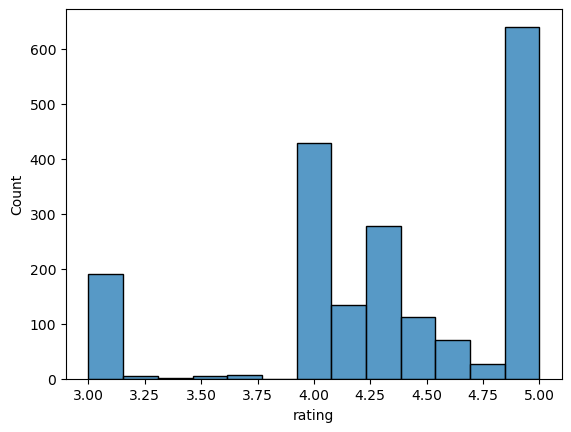

In [41]:
sns.histplot(data = data, x ='rating');

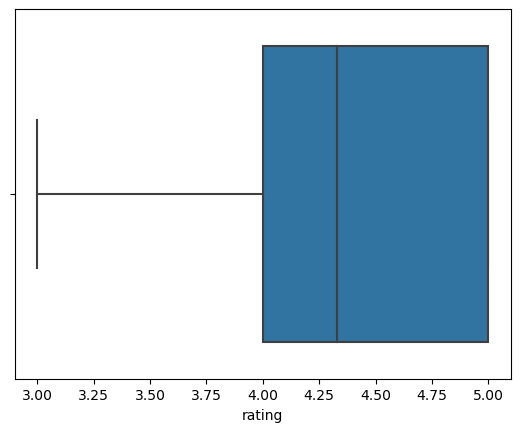

In [54]:
sns.boxplot(data = data, x ='rating');

As we can observe that the median is closer to Q1 which shows that it is right skewed but the median is very close to mean so we can say it is slightly skewed but there is no right whisker which also indicates that this is left skewed. So quantatively, we tried using Quartile coefficient of skewness $K = ((Q3-Q2)-(Q2-Q1))/(Q3-Q1)$ and this K is 0.34 which is greater than 0 indicating a right skewed distribution

Most of the ratings are on the higher side and there are no ratings below 3

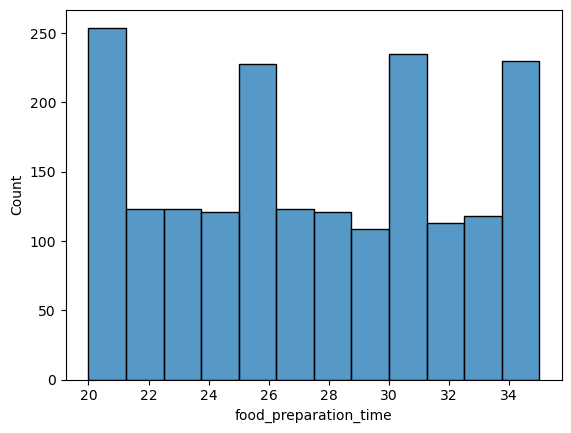

In [55]:
sns.histplot(data = data, x ='food_preparation_time');

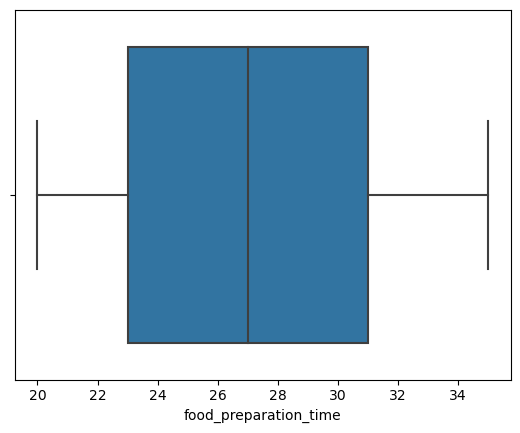

In [56]:
sns.boxplot(data = data, x ='food_preparation_time');

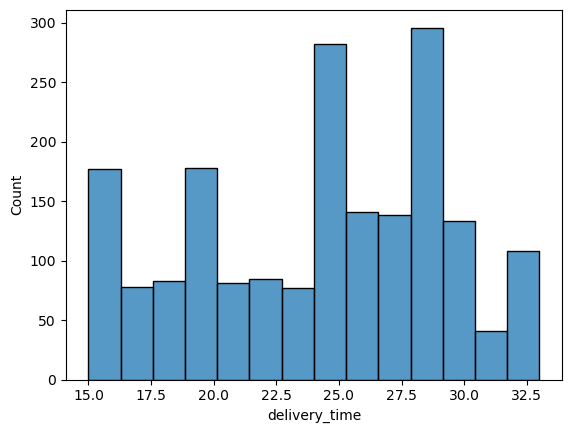

In [58]:
sns.histplot(data=data, x='delivery_time');

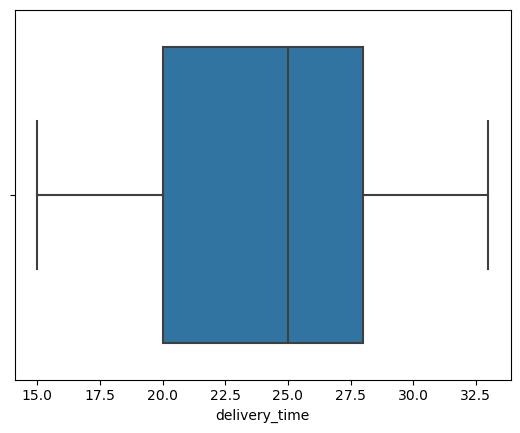

In [59]:
sns.boxplot(data=data, x='delivery_time');

In [44]:
# check unique values for the day of the week
data['day_of_the_week'].nunique()

2

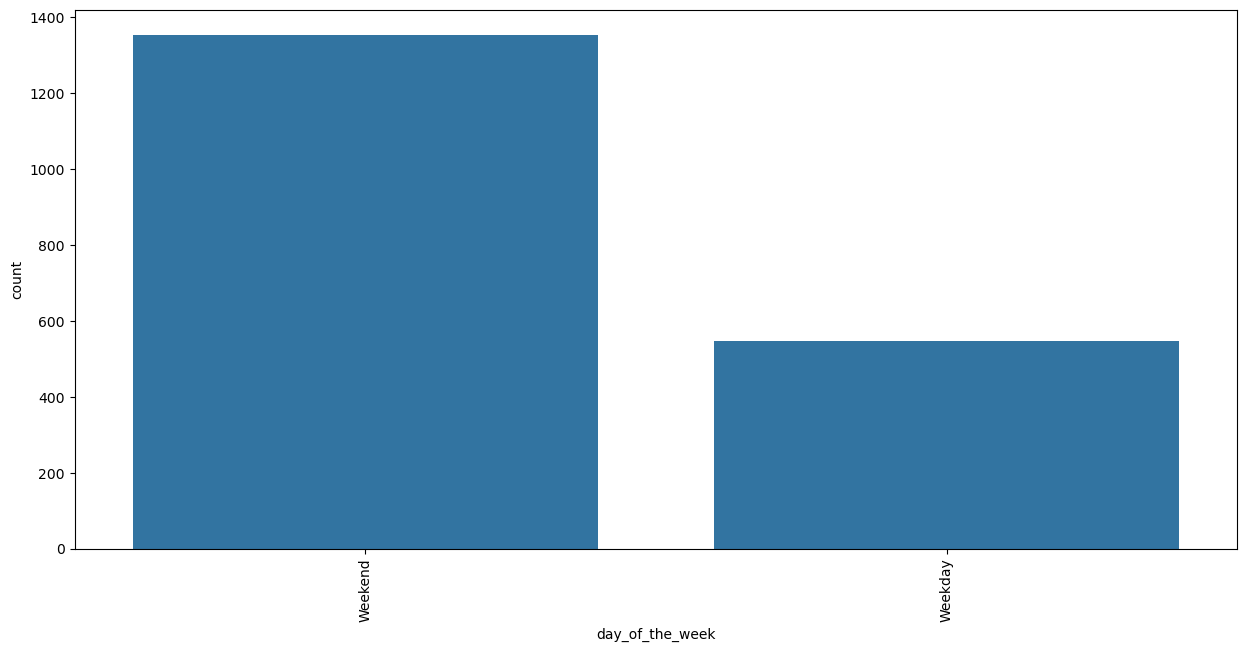

In [56]:
plt.figure(figsize=(15,7))
sns.countplot(data = data, x='day_of_the_week');
plt.xticks(rotation=90);

We can observe that more orders are placed on weekend as compared to Weekday
Weekend orders are more than double of the orders placed on weekday

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Write the code here
data['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
* The top restaurant that has received the maximun number of orders received is Shake Shack followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [49]:
data[data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().sort_values(ascending=False).head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [62]:
data.loc[data['day_of_the_week']=='Weekend','cuisine_type'].mode()[0]

'American'

#### Observations:
 
 American is the most popular cuisine on the weekends that has been ordered the most


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [66]:
# Write the code here
(((data['cost_of_the_order']>20).sum()/len(data))*100).round(2)

29.24

In [72]:
# Get orders that cost above 20 dollars
df_greater_than_20 = data[data['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / data.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
The percentage of orders received cost above 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [75]:
# Write the code here
print('The mean delivery time for this dataset is',(data['delivery_time'].mean()).round(2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
On an average an order takes around 24 mins to be delivered to the customer

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [76]:
# Write the code here
data['customer_id'].value_counts().sort_values(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The top customer with id '52832' has ordered 13 times followed by the second frequent customer with id '47440' ordering 10 times 


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


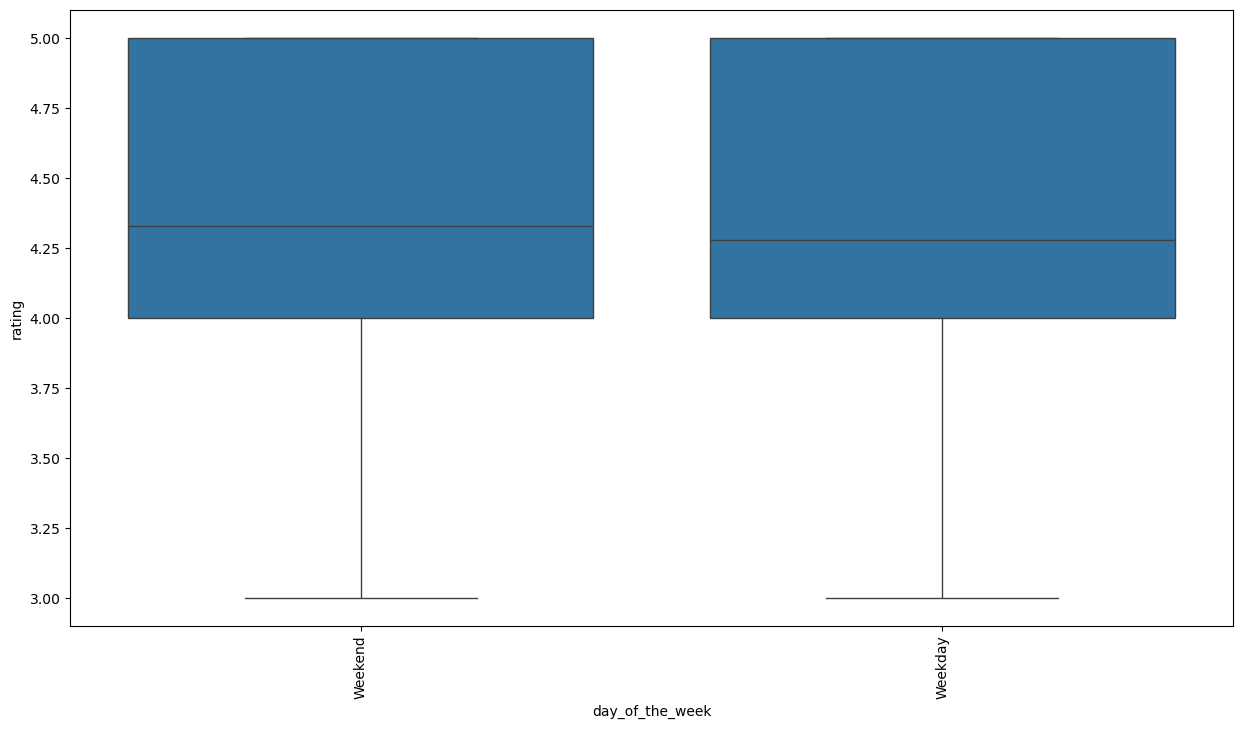

In [79]:
# Write the code here
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='day_of_the_week', y='rating')
plt.xticks(rotation=90);

The ratings vary similarly for both weekends and weekdays.
The median are very close to each other for both weekends and weekdays

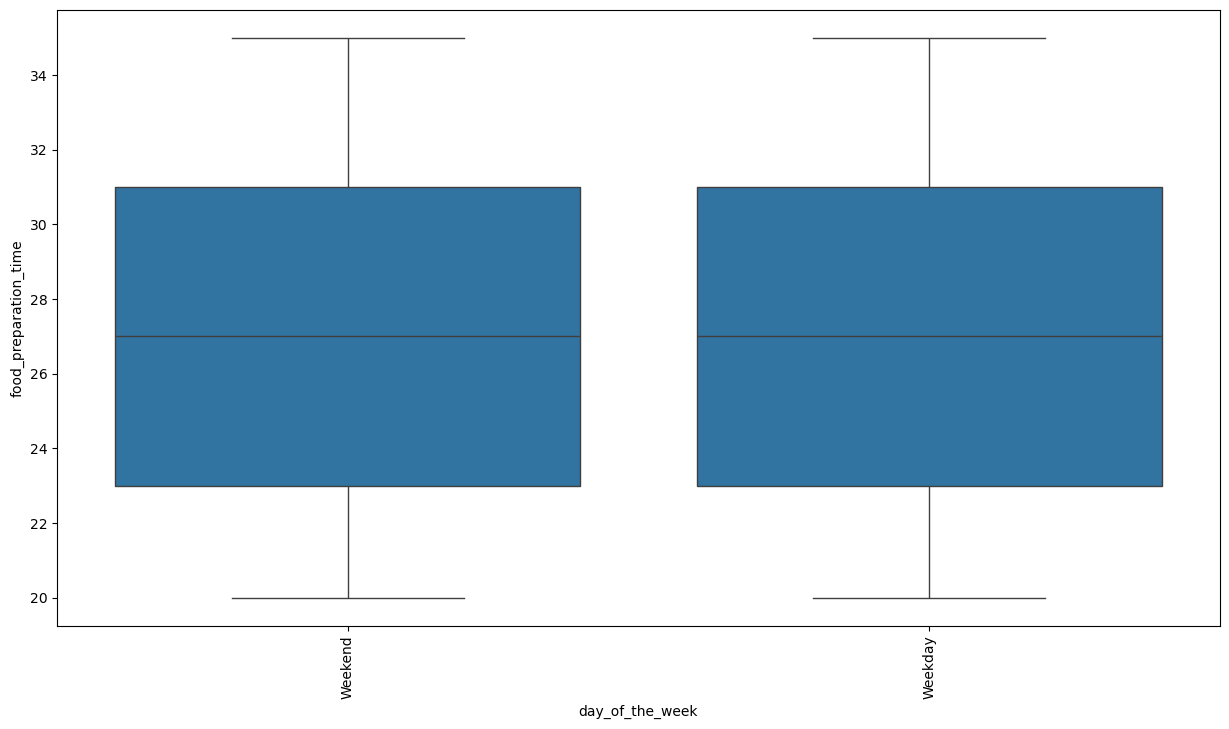

In [80]:
# Write the code here
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='day_of_the_week', y='food_preparation_time')
plt.xticks(rotation=90);

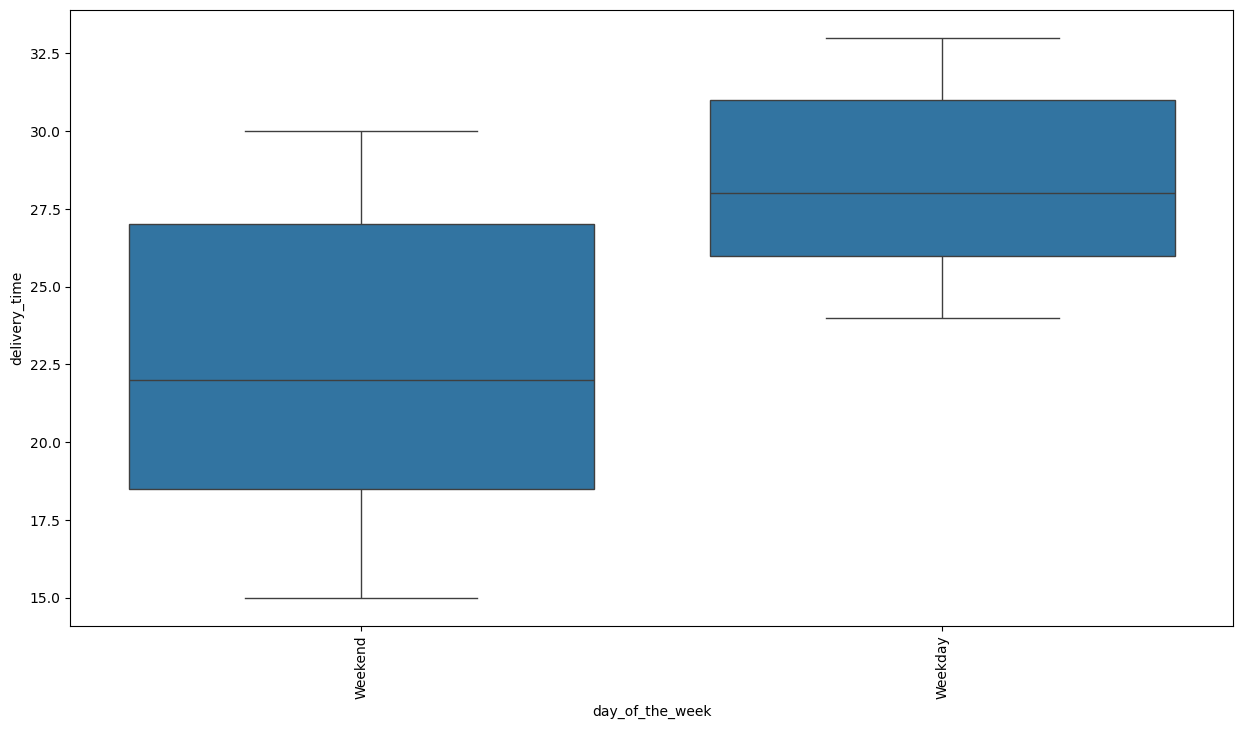

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation=90);

In [146]:
# plt.figure(figsize=(15,8))
# sns.boxplot(data=data, x='cuisine_type', y='rating')
# plt.xticks(rotation=90);

Only 3 cuisine types Korean,Thai,Spanish has outliers
25% of only Vietnamese rating is nearly 3.5 while others have ratings more than or equal to 4
Thai and Spanish have received the highest ratings for their orders

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_54128/437352641.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='mean')


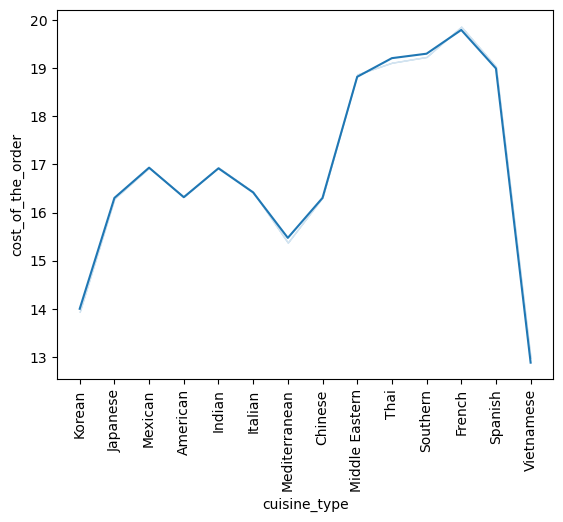

In [100]:
sns.lineplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='mean')
plt.xticks(rotation=90);

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_54128/2532057031.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='mean')


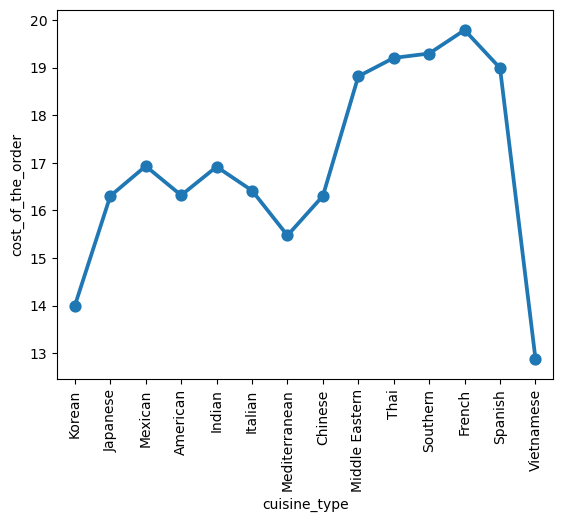

In [121]:
sns.pointplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='mean')
plt.xticks(rotation=90);

Average cost of French,Southern, Thai, Spanish and Middle Eastern orders are higher than the rest of the cuisine types

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_54128/2984432410.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=data, x='cuisine_type', y='rating',ci = False);


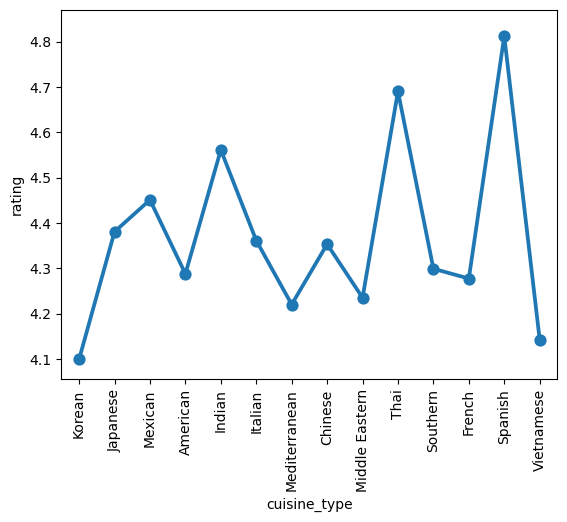

In [124]:
sns.pointplot(data=data, x='cuisine_type', y='rating',ci = False);
plt.xticks(rotation=90);

Average rating of Spanish and Thai orders are higher as compared to others while Vietnamese and Korean have received lowest average of ratings.

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_54128/3645722113.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=data, x='cuisine_type', y='food_preparation_time', ci=False, estimator='mean')


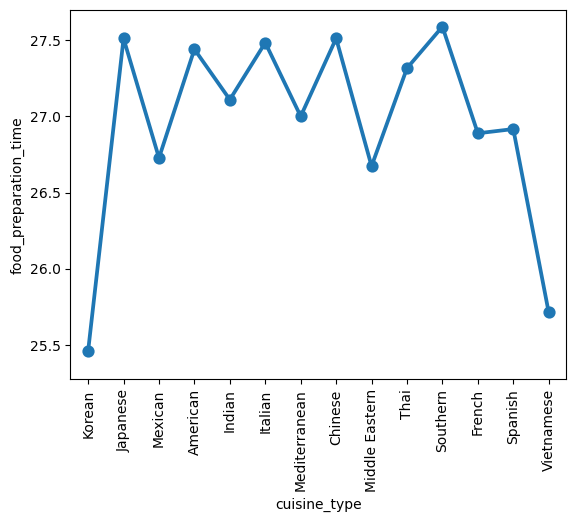

In [133]:
sns.pointplot(data=data, x='cuisine_type', y='food_preparation_time', ci=False, estimator='mean')
plt.xticks(rotation=90);

On an average Food preparation time do not vary much across the cuisine types

In [134]:
# sns.lineplot(data=data, x='cuisine_type', y='rating', ci=False, estimator='mean')
# plt.xticks(rotation=90);

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_54128/3106142712.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x = data['rating'].round(2), y = 'delivery_time', data = data,ci=False)


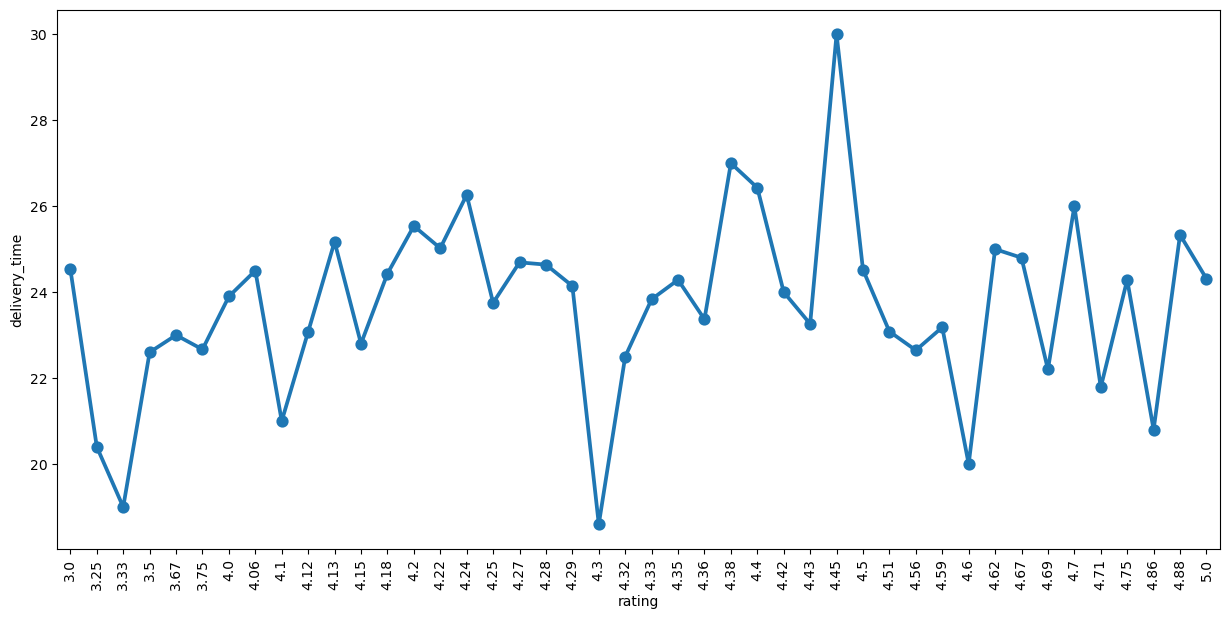

In [137]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = data['rating'].round(2), y = 'delivery_time', data = data,ci=False)
plt.xticks(rotation=90);
plt.show()


Ratings do not seem to depend much on the delivery time as higher delivery times also have the high ratings

In [138]:
# sns.lineplot(data=data, x='delivery_time', y='rating', ci=False, estimator='mean')
# plt.xticks(rotation=90);

/Users/abhijeetsahu/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/Users/abhijeetsahu/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/abhijeetsahu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhijeetsahu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


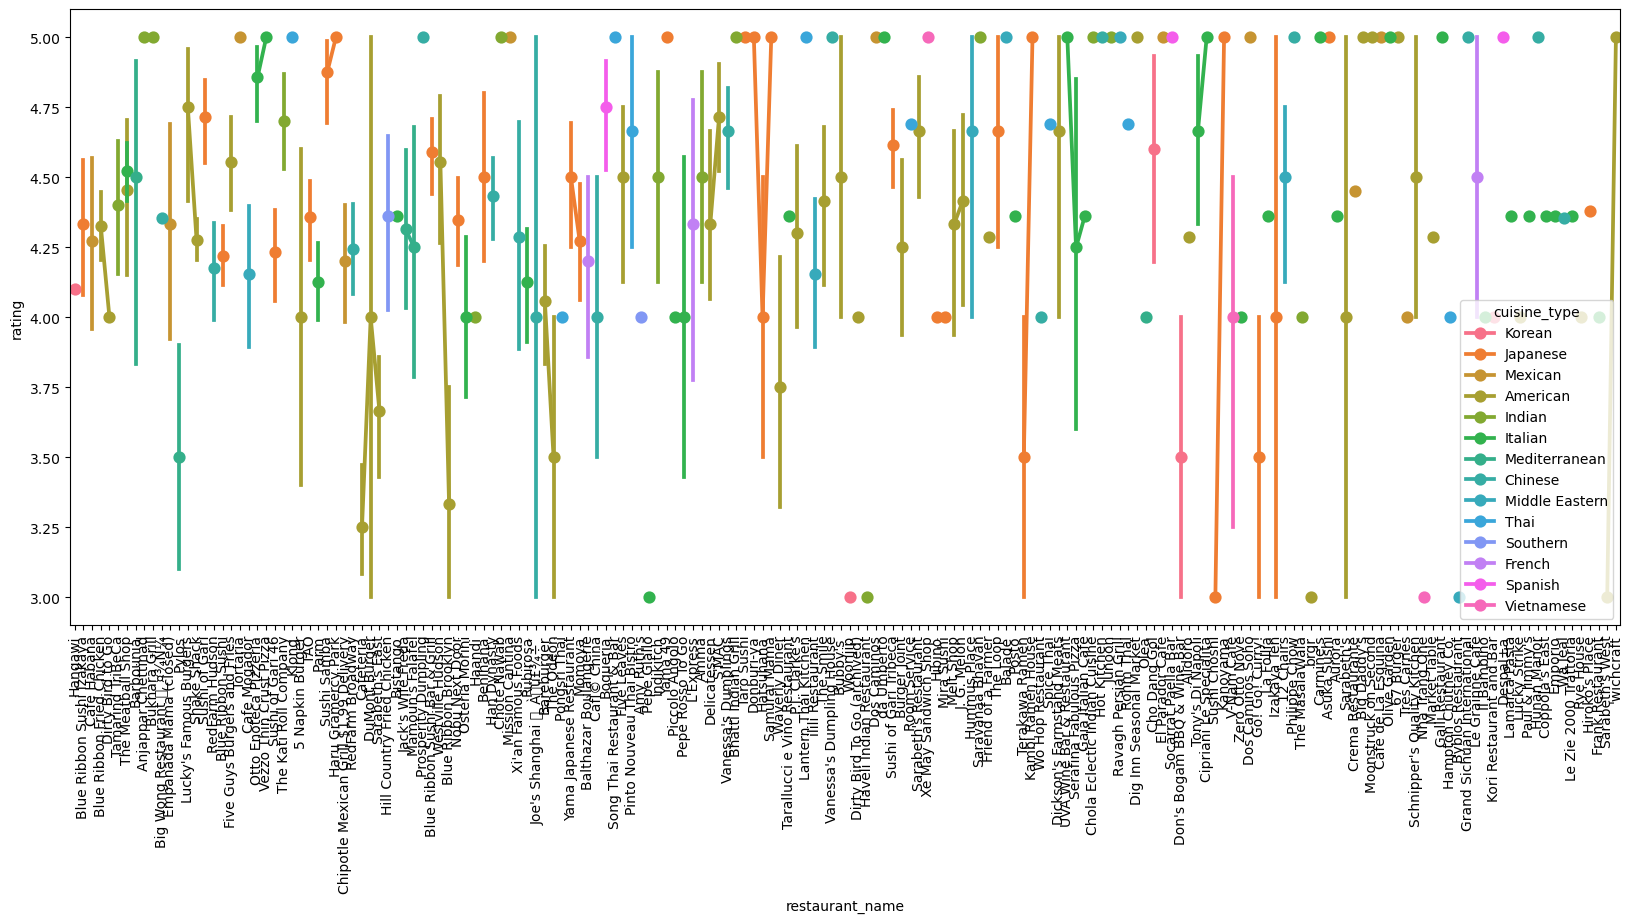

In [158]:
plt.figure(figsize=(20,8))
plot = sns.pointplot(data = data, x='restaurant_name',y='rating',hue='cuisine_type')
plt.xticks(rotation=90);

In [178]:
filtered_data = data[data.groupby('restaurant_name')['rating'].transform('mean') < 4]
filtered_data[['restaurant_name','cuisine_type','cost_of_the_order','Revenue']].sort_values(by='cost_of_the_order',ascending =False).tail(10)

,restaurant_name,cuisine_type,cost_of_the_order,Revenue
229,Sarabeth's East,American,9.41,1.41
495,Terakawa Ramen,Japanese,8.54,1.28
301,Woorijip,Korean,8.25,1.24
392,Waverly Diner,American,6.84,1.03
81,Cafeteria,American,6.69,1.00
1626,The Odeon,American,6.69,1.00
1476,Blue Ribbon Brooklyn,American,5.97,0.90
313,Haveli Indian Restaurant,Indian,5.72,0.86
372,Sarabeth's East,American,5.72,0.86
941,brgr,American,5.72,0.86


In [179]:
filtered_data.groupby('restaurant_name')['Revenue'].sum()

restaurant_name
Blue Ribbon Brooklyn         14.62
Byblos Restaurant            12.37
Cafeteria                    20.81
Don's Bogam BBQ & Wine Bar    5.84
Go! Go! Curry!               15.41
Haveli Indian Restaurant      8.13
Nha Trang One                 2.35
Pepe Giallo                   2.19
Pylos                        17.68
Sarabeth's East              22.35
Sarabeth's West               2.12
Sushi Choshi                  2.06
Terakawa Ramen                6.42
The Odeon                     5.03
Waverly Diner                18.25
Woorijip                      1.24
brgr                          2.97
Name: Revenue, dtype: float64

In [190]:
(data.groupby('restaurant_name')['Revenue'].sum()).sort_values(ascending =False).tail(51)

restaurant_name
Piccolo Angolo                  5.29
The Odeon                       5.03
DespaÌ±a                        4.96
Izakaya Ten                     4.70
Big Daddy's                     4.04
Mira Sushi                      3.73
Bukhara Grill                   3.56
Olive Garden                    3.43
Xe May Sandwich Shop            3.30
brgr                            2.97
Haandi                          2.82
Zero Otto Nove                  2.71
Anjappar Chettinad              2.47
Chote Nawab                     2.42
Galli Restaurant                2.41
Cafe de La Esquina              2.41
Taro Sushi                      2.41
Paul & Jimmy's                  2.41
Spice Thai                      2.38
Crema Restaurante               2.38
Dig Inn Seasonal Market         2.36
Nha Trang One                   2.35
Le Zie 2000 Trattoria           2.32
Moonstruck on Second            2.24
Pepe Giallo                     2.19
Wo Hop Restaurant               2.12
Sarabeth's West       

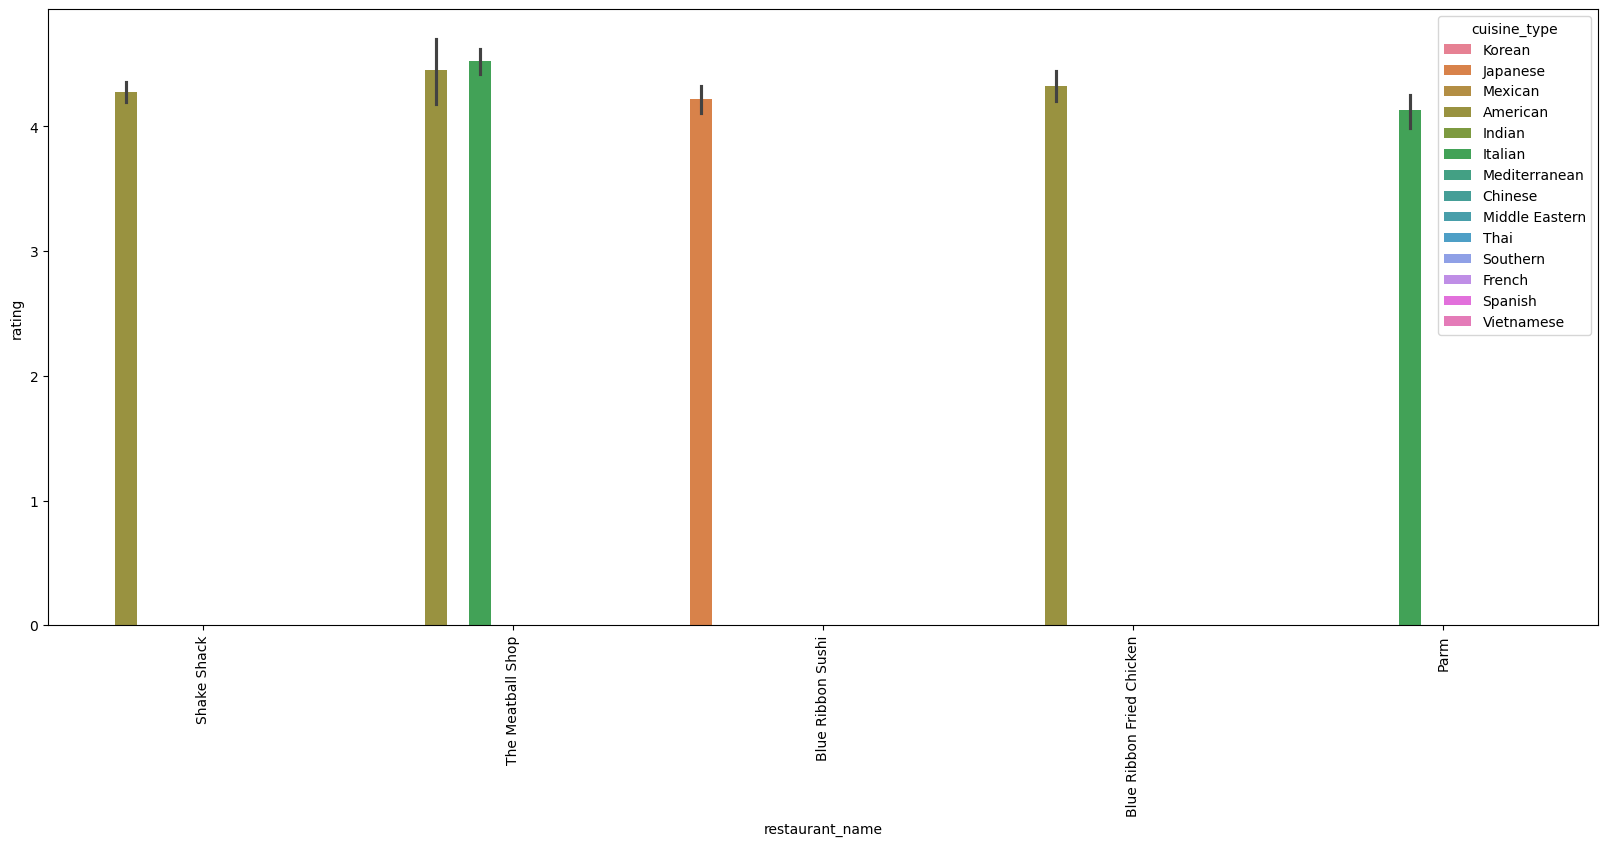

In [140]:
plt.figure(figsize=(20,8))
plot = sns.barplot(data = data, x='restaurant_name',y='rating',width=1,order=data['restaurant_name'].value_counts().nlargest(5).index,hue='cuisine_type')
plt.xticks(rotation=90);

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_54128/3453763177.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = data.corr(), annot = True,cmap = 'coolwarm')


<Axes: >

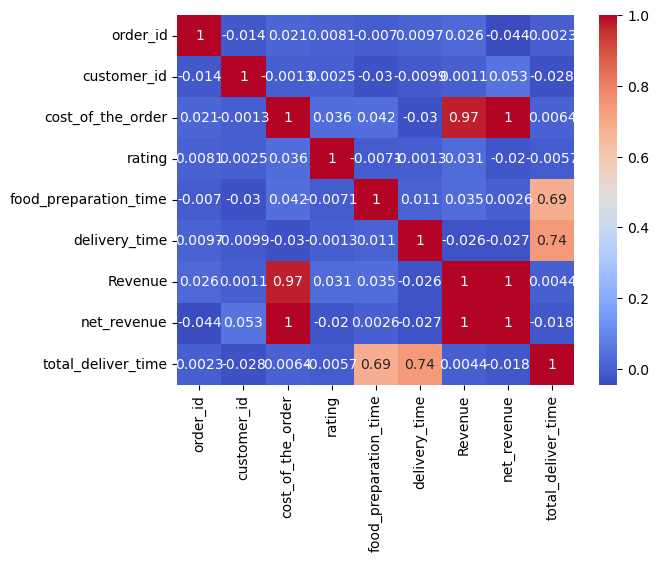

In [141]:
sns.heatmap(data = data.corr(), annot = True,cmap = 'coolwarm')

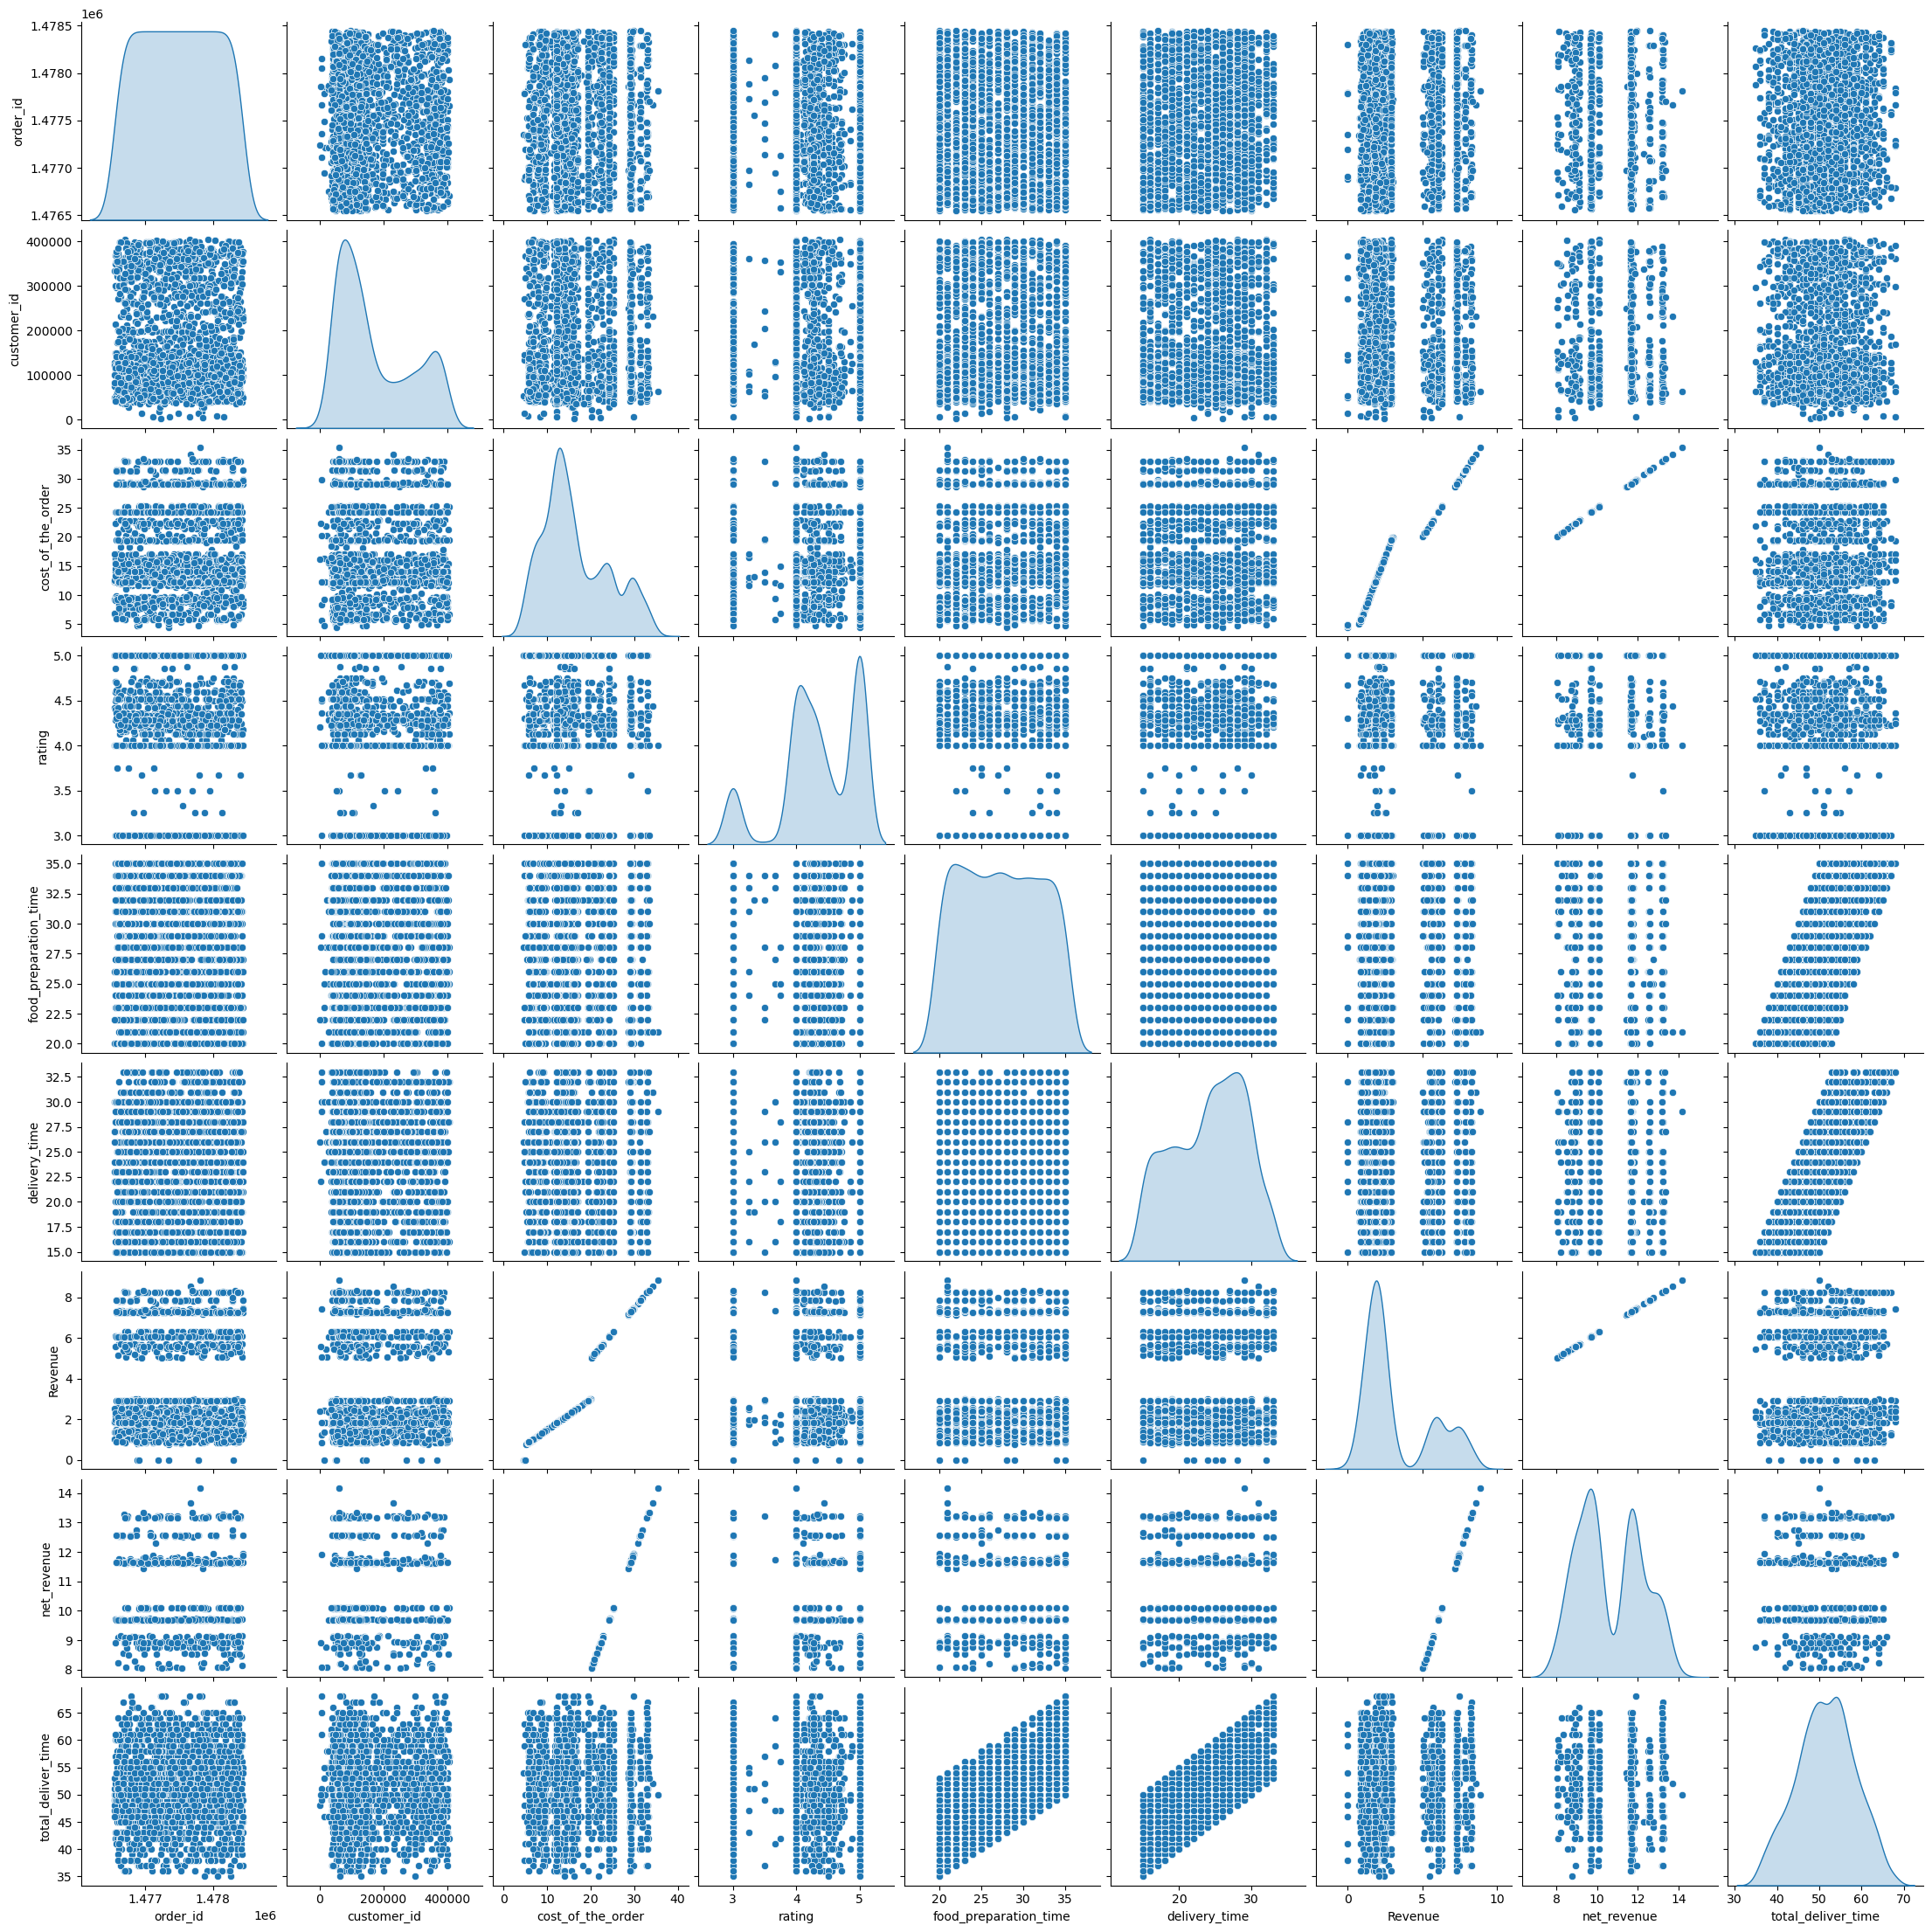

In [143]:
sns.pairplot(data=data, diag_kind="kde")
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [32]:
# Write the code here
data.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index().query('mean > 4.0 and count > 50')

,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,96,4.33
21,Blue Ribbon Sushi,119,4.22
109,Parm,68,4.13
121,RedFarm Broadway,59,4.24
122,RedFarm Hudson,55,4.18
136,Shake Shack,219,4.28
153,The Meatball Shop,132,4.51


In [206]:
data_orig.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index().query('mean > 4.0 and count > 50')

TypeError: Could not convert 4Not given5Not given to numeric

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [148]:
#function to determine the revenue
def compute_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

data['Revenue'] = data['cost_of_the_order'].apply(compute_revenue)
data.head()
data['Revenue']

0      7.69
1      1.81
2      1.83
3      7.30
4      1.74
       ... 
1893   5.58
1894   1.83
1895   6.30
1896   1.83
1897   2.92
Name: Revenue, Length: 1898, dtype: float64

#### Observations:
The company is earning revenue on all the orders as all of them are atleast greater than 5 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [156]:
# Write the code here
data['total_deliver_time']=data['food_preparation_time']+data['delivery_time']
percentage_of_orders =(((data['total_deliver_time'] >60).sum()/len(data))*100).round(2)
percentage_of_orders

10.54

In [ ]:
percentage_of_orders =(((data['total_deliver_time'] >60).sum()/len(data))*100).round(2)

#### Observations:
Around 10% of orders take more than 60 mins to get delivered to the customer from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [191]:
# Write the code here
print('The mean delivery time on weekdays is around',
      round(data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [89]:
print('The mean delivery time on weekdays is around',
      round(data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


#### Observations:
The mean delivery time is around 28 mins on weekdays and around 22 mins on weekends and this shows that the delivery takes higher time on weekdays than weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are 1898 rows and 9 columns in the food hub order dataset
* Shake Shack is the top restaurant which has received the highest no of orders. The Meatball Shop and Blue Ribbon   Sushi are the next larget restaurants
* The top 3 cuisine types are American, Japanese and Italian. American being the most popular of all. The bottom 3   cuisine types are Vietnamese, Spanish and Korean.
* The average cost of the order is 16.5 dollars. And 50% of the orders are priced between 12 to 22.
* Most of the ratings are on the higher side and there are no ratings below 3
* The percentage of orders received cost above 20 dollars is around 29%
* On an average an order takes ~24 mins to be delivered to the customer
* Average cost of French,Southern, Thai, Spanish and Middle Eastern orders are higher than the rest of the cuisine   types
* Average rating of Spanish and Thai orders are higher as compared to others while Vietnamese and Korean have    received lowest average of ratings.
* The mean delivery time is around 28 mins on weekdays and around 22 mins on weekends and this shows that the   delivery takes higher time on weekdays than weekends.
* Around 10% of the orders take more than 60 mins to get delivered to the customer from the time the order is placed.
* There is no much correlation between the variables.

### Recommendations:

* Strengthen the collaboration with existing restaurants which provides top cuisine types like American, Japanese, Italian. And also look for new collaboration for these top performing cuisine types
* Collaborate with those restaurants that provides French,Spanish and Thai cuisines as generally these have higher average costs and good ratings
* The company should prioritize reducing collaboration with low performing restaurants


---